In [3]:
import pandas as pd
movies_df = pd.read_csv('data/processed_data.csv', index_col=0)

# Correlation

<AxesSubplot:>

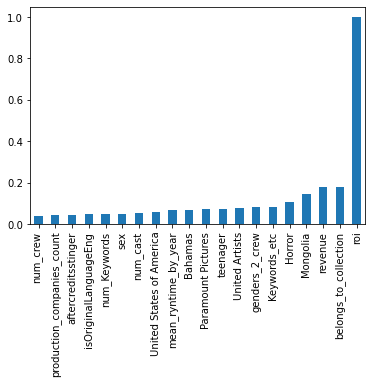

In [15]:
pd.DataFrame.corrwith(movies_df, movies_df.roi).dropna().sort_values().tail(20).plot.bar()

In [5]:
movies_df[movies_df.roi>120].index

Int64Index([], dtype='int64', name='movie_id')

<AxesSubplot:>

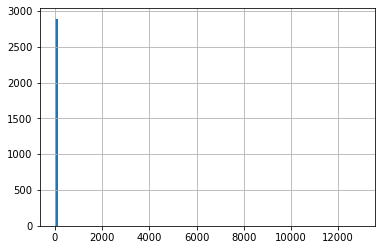

In [218]:
movies_df['roi'].hist(bins=100)

In [225]:
movies_df[movies_df.roi>10]

,belongs_to_collection,budget,production_countries,runtime,revenue,year,month,day,dayofweek,quarter,...,isOriginalLanguageEng,production_countries_count,production_companies_count,country_category,cci,cpi,gdp,rir,uer,roi
movie_id,,,,,,,,,,,,,,,,,,,,,
4,False,1200000.0,India,122.0,16000000,2012,3,9,4,1,...,0,5,0,ROW,99.426146,0.977699,66209.935473,3.477707,6.266667,12.333333
8,False,60000.0,NaN,84.0,2586511,2004,1,15,3,1,...,1,0,0,ROW,101.286985,1.155489,43229.915798,3.173943,5.278333,42.108517
11,True,1000000.0,United States of America,119.0,117235147,1976,11,21,6,4,...,1,24,14,USA,100.303921,10.674475,5619.497344,-1.166520,7.800000,116.235147
13,False,15000000.0,United States of America,122.0,356296601,1999,9,15,2,3,...,1,24,24,USA,98.777448,24.081699,15024.803513,1.919998,8.357000,22.753107
31,False,13000000.0,France,112.0,426480871,2011,11,2,2,4,...,0,6,31,EUR,97.925944,3.218333,38341.333349,2.776399,10.504737,31.806221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,True,5000000.0,United States of America,95.0,142817992,2012,10,17,2,4,...,1,24,43,USA,100.148487,3.189755,36085.718728,3.157537,6.550000,27.563598
2941,False,4300000.0,United States of America,111.0,102000000,1977,11,30,2,4,...,1,24,50,USA,100.196297,9.328001,6041.551827,-0.405596,6.400000,22.720930
2946,False,1000000.0,United Kingdom,128.0,37600000,1963,10,6,5,4,...,1,14,24,ROW,100.000000,3.080874,2344.701345,3.529872,7.500000,36.600000


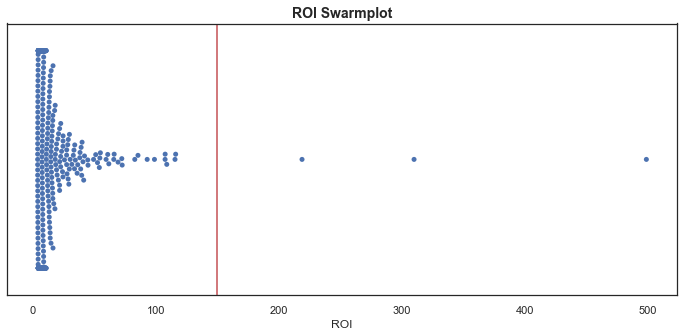

In [248]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(12,5))
ax = sns.swarmplot(x=movies_df[(movies_df.roi>4) & (movies_df.roi<1000)].roi, ax=ax)
ax.set_title("ROI Swarmplot", fontdict={"fontsize": 14, "fontweight": "bold"})
plt.axvline(150, c='r')
ax.set_xlabel("ROI")
plt.savefig("images/roi_swarmplot.svg")
plt.show()

## EDA CHARTS

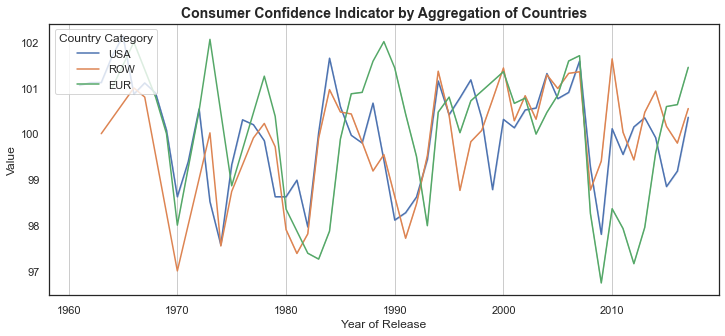

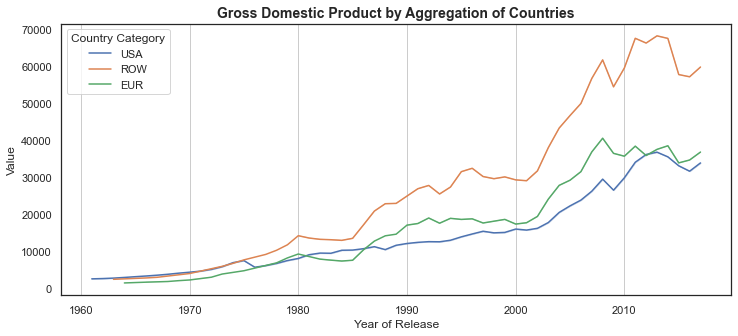

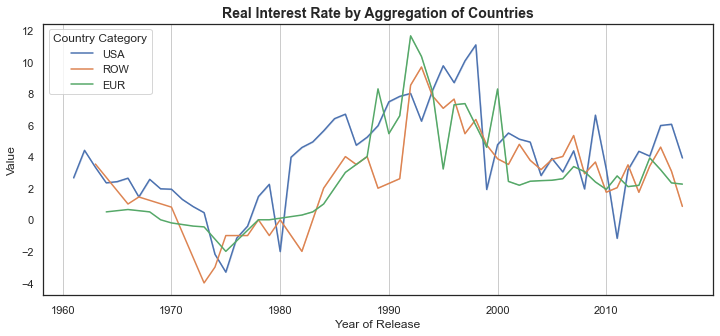

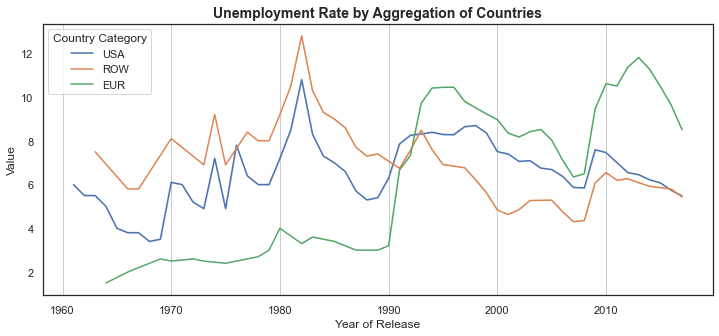

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt


def plot_eda(key, title_name):
    sns.set_theme(style="white")

    fig, ax = plt.subplots(figsize=(12,5))
    ax = sns.lineplot(
        x=movies_df["year"], y=movies_df[key], hue=movies_df["country_category"], ax=ax
    )
    ax.set_xlabel("Year of Release", fontsize=12)
    ax.set_ylabel("Value", fontsize=12)
    # plt.set_title('Consumer Confidence Indicator by Aggregation of Countries', size=14);
    ax.set_title(
        f"{title_name} by Aggregation of Countries",
        fontdict={"fontsize": 14, "fontweight": "bold"},
    )
    ax.grid(axis="x", which='major', linewidth=1)
    plt.legend(title='Country Category',  loc='upper left') ##, labels=['USA', 'Rest of the World', 'Euro Area'])
    plt.savefig(f"images/{key}_eda_chart.jpg")
    plt.show()
    
_keys_dict = {
    'cci': "Consumer Confidence Indicator",
    'gdp': "Gross Domestic Product",
    'rir': "Real Interest Rate",
    'uer': "Unemployment Rate",
 #   'cpi': "CPI",
}
for key, title_name in _keys_dict.items():
    plot_eda(key=key, title_name=title_name)

In [ ]:
# change axes range
# make the chart bigger
# move the legend
# rename legend items

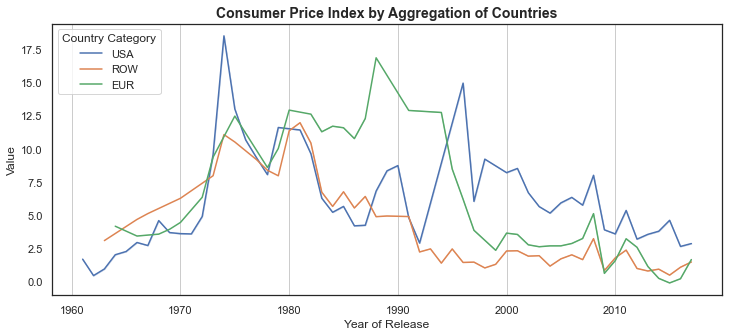

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
use_Data = movies_df.cpi[movies_df.cpi <20]

sns.set_theme(style="white")

fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(
        x=movies_df["year"], y=use_Data, hue=movies_df["country_category"], ax=ax
    )
ax.set_xlabel("Year of Release", fontsize=12)
ax.set_ylabel("Value", fontsize=12)
    # plt.set_title('Consumer Confidence Indicator by Aggregation of Countries', size=14);
plt.legend(title='Country Category',  loc='upper left')

ax.set_title(
        f"Consumer Price Index by Aggregation of Countries",
        fontdict={"fontsize": 14, "fontweight": "bold"},
    )
ax.grid(axis="x", which='major', linewidth=1)
plt.savefig(f"CPI_eda_chart.jpg")
plt.show()